<a href="https://colab.research.google.com/github/preritt/CS231n-/blob/master/(Transfer1)cifar103ClassAccuracyHighDIScoreCrossCrossVer06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical
from keras.datasets import cifar10
from sklearn import preprocessing
from keras import losses

Using TensorFlow backend.


In [0]:

from keras.models import model_from_json

In [0]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

170500096/170498071 [==============================] - 24s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  # Remove the CWD from sys.path while we load stuff.


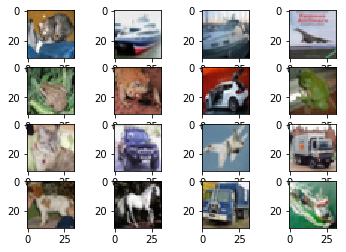

In [4]:
from matplotlib import pyplot
from scipy.misc import toimage
from keras.datasets import cifar10
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k+1
    # show the plot
    pyplot.show()
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_imgs(x_test[:16])


In [5]:
x_test.shape

(10000, 32, 32, 3)

In [0]:
# This function takes the entire traaining data and test data and corresponding categorical label and returns the corresponding data in class indices
def getThreeClassesTrainTest(class_indices,train_data,train_labels,test_data,test_labels):
  all_train_data = []
  all_train_data_label = []
  all_test_data = []
  all_test_data_label = []
  for ind in class_indices:
    this_class_location_train =  np.where(train_labels==ind)[0] # train_labels[train_labels == ind]
    this_class_data_train = train_data[this_class_location_train,:]
    this_class_data_train_label = train_labels[this_class_location_train]
    print(this_class_location_train)
    
    this_class_location_test = np.where(test_labels==ind)[0] #test_labels[test_labels == ind]
    this_class_data_test = test_data[this_class_location_test,:]
    this_class_data_test_label = test_labels[this_class_location_test]
    
    all_train_data.append(this_class_data_train)
    all_test_data.append(this_class_data_test)
    all_train_data_label.append(this_class_data_train_label)
    all_test_data_label.append(this_class_data_test_label)
    
  train_data_three = all_train_data[0]
  train_label_three = all_train_data_label[0]
  test_data_three = all_test_data[0]
  test_label_three = all_test_data_label[0]
  
  for j in range(1,len(class_indices)):
    train_data_three = np.concatenate((train_data_three,all_train_data[j]))
    train_label_three = np.concatenate((train_label_three,all_train_data_label[j]))

    test_data_three = np.concatenate((test_data_three,all_test_data[j]))
    test_label_three = np.concatenate((test_label_three,all_test_data_label[j]))
  print(train_label_three.shape)
  train_label_three = np.reshape(train_label_three,newshape=(-1,))
  test_label_three = np.reshape(test_label_three,newshape=(-1,))
  return train_data_three, train_label_three, test_data_three,test_label_three

### Get only three classes of data and train the model on it

In [7]:
train_three_data,train_three_label,test_three_data,test_three_label = getThreeClassesTrainTest([0,3,5 ],x_train,y_train,x_test,y_test)

[   29    30    35 ... 49941 49992 49994]
[    9    17    21 ... 49979 49982 49983]
[   27    40    51 ... 49964 49980 49988]
(15000, 1)


(array([5000.,    0.,    0.,    0.,    0.,    0., 5000.,    0.,    0.,
        5000.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

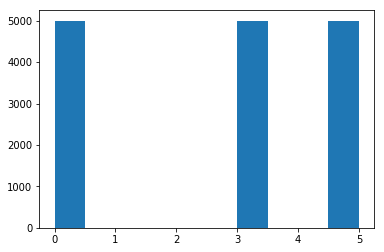

In [8]:
plt.hist(train_three_label)

(array([1000.,    0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,
        1000.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

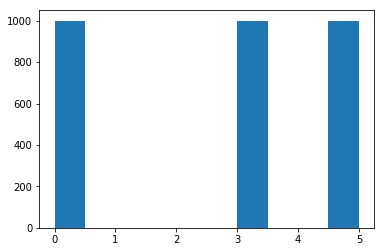

In [9]:
# test_three_label.shape
plt.hist(test_three_label)

In [0]:
train_three_data, train_three_label = shuffle(train_three_data, train_three_label )
test_three_data,test_three_label = shuffle(test_three_data,test_three_label )

In [0]:
le = preprocessing.LabelEncoder()
le.fit_transform(train_three_label)
train_three_label_cat = le.transform(train_three_label)
test_three_label_cat = le.transform(test_three_label)

In [12]:
train_three_label_cat.shape

(15000,)

In [0]:
train_three_label_one_hot = to_categorical(train_three_label_cat)
test_three_label_one_hot = to_categorical(test_three_label_cat)


In [14]:
test_three_label_one_hot.shape

(3000, 3)

In [0]:
# split train data and to create validation data
train_X,valid_X,train_ground,valid_ground = train_test_split(train_three_data,
                                                             train_three_label_one_hot,
                                                             test_size=0.2,
                                                             random_state=13)

In [0]:
num_classes = test_three_label_one_hot.shape[1]

In [0]:
x, y = 32, 32
inChannel = 3
input_img = Input(shape = (x, y, inChannel))
ep = 10 
weight_decay = 1e-4

In [0]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

In [0]:
def cifar10Classifier(input_img):
  
  conv1 = (Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:], activation='elu'))(input_img)
  conv1 = BatchNormalization()(conv1)
  conv1 = (Conv2D(32, (3,3), padding='same', activation= 'elu',kernel_regularizer=regularizers.l2(weight_decay)))(conv1)
  conv1 = BatchNormalization()(conv1)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
  drop1= Dropout(.2)(pool1)

  conv2 = (Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), activation='elu'))(drop1)
  conv2 = BatchNormalization()(conv2)
  conv2 = (Conv2D(64, (3,3), padding='same', activation= 'elu',kernel_regularizer=regularizers.l2(weight_decay)))(conv2)
  conv2 = BatchNormalization()(conv2)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #14 x 14 x 32
  drop2= Dropout(.3)(pool2)

  conv3 = (Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), activation='elu'))(drop2)
  conv3 = BatchNormalization()(conv3)
  conv3 = (Conv2D(128, (3,3), padding='same', activation= 'elu',kernel_regularizer=regularizers.l2(weight_decay)))(conv3)
  conv3 = BatchNormalization()(conv3)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3) #14 x 14 x 32
  drop3= Dropout(.4)(pool3)

  flat = Flatten()(drop3)
  out = Dense(num_classes, activation='softmax')(flat)
  
  return out

In [20]:
json_file_high = open('modelHigh.json', 'r')
loaded_model_json_high = json_file_high.read()
json_file_high.close()
loaded_model_high = model_from_json(loaded_model_json_high)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# loaded_model_high.summary()

In [0]:
# loaded_model_high.get_layer('conv2d_1').get_weights()

In [0]:
model = Model(input_img, (cifar10Classifier(input_img)))

In [0]:
model.get_layer('conv2d_1').set_weights(loaded_model_high.get_layer('conv2d_1').get_weights())

In [0]:
model.get_layer('conv2d_1').trainable = True

In [0]:
# model.get_layer('conv2d_1').get_weights()

In [27]:

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(train_three_data)
 
#training
batch_size = 64
 
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
# model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

model.compile(loss=losses.categorical_crossentropy, optimizer=opt_rms, metrics=['accuracy'])

model.summary()
 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
__________

In [0]:
mcp_save = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', save_best_only=False, monitor='val_loss', mode='auto')

train_X,valid_X,train_ground,valid_ground

In [29]:
model.fit_generator(datagen.flow(train_X, train_ground, batch_size=batch_size),\
                    steps_per_epoch=train_X.shape[0] // batch_size,epochs=20,\
                    verbose=1,validation_data=(valid_X,valid_ground),
                    shuffle = True,callbacks=[mcp_save,LearningRateScheduler(lr_schedule)])
#save to disk
# model_json = model.to_json()
# with open('model.json', 'w') as json_file:
#     json_file.write(model_json)
# model.save_weights('model.h5') 
 


Instructions for updating:
Use tf.cast instead.
Epoch 1/20
187/187 [==============================] - 15s 80ms/step - loss: 1.1175 - acc: 0.6019 - val_loss: 0.7931 - val_acc: 0.6657
Epoch 2/20
187/187 [==============================] - 10s 56ms/step - loss: 0.7826 - acc: 0.6745 - val_loss: 0.7238 - val_acc: 0.6997
Epoch 3/20
187/187 [==============================] - 10s 55ms/step - loss: 0.6781 - acc: 0.7092 - val_loss: 0.6276 - val_acc: 0.7397
Epoch 4/20
187/187 [==============================] - 10s 54ms/step - loss: 0.6300 - acc: 0.7322 - val_loss: 0.5697 - val_acc: 0.7650
Epoch 5/20
187/187 [==============================] - 10s 55ms/step - loss: 0.5901 - acc: 0.7574 - val_loss: 0.5485 - val_acc: 0.7813
Epoch 6/20
187/187 [==============================] - 10s 56ms/step - loss: 0.5530 - acc: 0.7741 - val_loss: 0.6835 - val_acc: 0.7373
Epoch 7/20
187/187 [==============================] - 10s 55ms/step - loss: 0.5469 - acc: 0.7821 - val_loss: 0.5027 - val_acc: 0.7970
Epoch 8/20
187

In [0]:
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)

In [0]:
# loaded_model.compile(loss=losses.categorical_crossentropy, optimizer=opt_rms, metrics=['accuracy'])


In [0]:
model.load_weights('weights.18-0.41.hdf5')

In [31]:
model.evaluate(valid_X, valid_ground, verbose=0)

[0.412868101755778, 0.8563333333333333]

In [32]:
#testing
test_eval = model.evaluate(test_three_data, test_three_label_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.3849576512972514
Test accuracy: 0.872666666507721


In [33]:
test_three_data.shape

(3000, 32, 32, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  # Remove the CWD from sys.path while we load stuff.


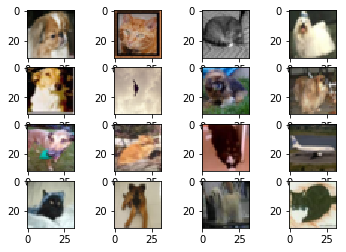

In [34]:
# show_imgs(test_three_data[:,1])
show_imgs(test_three_data[:16])

In [0]:
def getDIScoreOfLayer(layer_output, true_labels):
  # computeScatterMatrix
  rho = 1e-6
  mu = layer_output.mean(axis=0)
#   print(mu.shape)
  mu = mu.reshape((1,-1))
  centered_data = layer_output - mu
  S_bar = np.matmul(centered_data.T,centered_data)
  # compute between class matrix
  total_classes = true_labels.max()
  S_B = np.zeros(shape = (mu.shape[1],mu.shape[1]))
  S_W = np.zeros(shape = (mu.shape[1],mu.shape[1]))
  unique_classes = np.unique(true_labels)
  unique_classes_list = np.ndarray.tolist(unique_classes)
  for l in unique_classes_list:
    class_l_index = np.where(true_labels == l)
    class_l_output = layer_output[class_l_index[0],:]
    mu_l = class_l_output.mean(axis=0)
    mu_l = mu_l.reshape((1,-1))
    total_examples_this_class = class_l_index[0].shape   
    ss = mu_l - mu
    S_B = S_B + total_examples_this_class*np.matmul((mu_l - mu).T,(mu_l - mu))

  DI_Score = np.trace(np.matmul(np.linalg.inv(S_bar + rho*np.eye(S_bar.shape[0])),S_B))
  return DI_Score

In [0]:
def getDIScoreOfLayerCNNLayer(cnn_outputs, true_labels):
  # computeScatterMatrix
  number_of_filters = cnn_outputs.shape[3]
  cnn_di_scores = []
  for filt in range(0,number_of_filters):
    outputs_filter = cnn_outputs[:,:,:,filt]
    outputs_filter_reshaped = np.reshape(outputs_filter, newshape=(cnn_outputs.shape[0],-1))
    this_filter_score = getDIScoreOfLayer(outputs_filter_reshaped, true_labels)
    cnn_di_scores.append(this_filter_score)
  return cnn_di_scores

In [37]:
# layer_name
valid_X.shape

(3000, 32, 32, 3)

In [0]:
# train_three_data, train_three_label

In [0]:
layer_name = 'conv2d_1'
get_cnn1_output_function = K.function([model.layers[0].input],
                                  [model.get_layer(layer_name).output])   #get_layer test_three_label
cnn1_output = get_cnn1_output_function([train_three_data])[0]

In [40]:
cnn1_output.shape

(15000, 32, 32, 32)

In [41]:
cnn1_output.shape

(15000, 32, 32, 32)

In [42]:
np.ndarray.tolist(np.unique(test_three_label))

[0, 3, 5]

In [0]:
# valid_ground_cat = np.argmax(train_ground, axis=1)
# # valid_ground_cat
# valid_ground.shape

In [0]:

di_scores = getDIScoreOfLayerCNNLayer(cnn1_output, train_three_label)

Text(0, 0.5, 'DI Score')

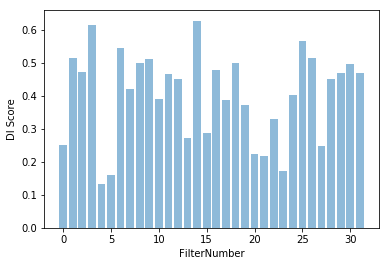

In [45]:
y_pos  = np.arange(len(di_scores))
plt.bar(y_pos, di_scores, align='center', alpha=0.5)
plt.xlabel('FilterNumber')
plt.ylabel('DI Score')

## DI on different data

1.   List item
2.   List item



In [0]:

train_three_data_low,train_three_label_low,test_three_data_low,test_three_label_low = getThreeClassesTrainTest([0,3,5],x_train,y_train,x_test,y_test)

[   29    30    35 ... 49941 49992 49994]
[    9    17    21 ... 49979 49982 49983]
[   27    40    51 ... 49964 49980 49988]
(15000, 1)


In [0]:

# split train data and to create validation data
train_X_low,valid_X_low,train_ground_low,valid_ground_low = train_test_split(train_three_data_low,
                                                             train_three_label_low,
                                                             test_size=0.2,
                                                             random_state=13)

In [0]:
layer_name = 'conv2d_1'
get_cnn1_output_function_low = K.function([model.layers[0].input],
                                  [model.get_layer(layer_name).output])   #get_layer test_three_label
cnn1_output_low = get_cnn1_output_function_low([train_three_data_low])[0]
cnn1_output_low.shape

(15000, 32, 32, 32)

In [0]:
test_three_label_low

array([0, 0, 0, ..., 5, 5, 5])

In [0]:
di_scores_low = getDIScoreOfLayerCNNLayer(cnn1_output_low, test_three_label_low)


(0, 0.65)

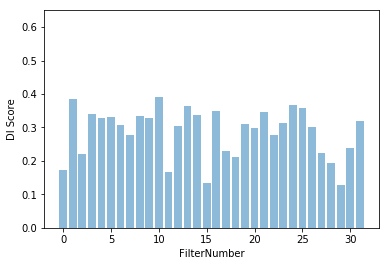

In [0]:
y_pos  = np.arange(len(di_scores_low))
plt.bar(y_pos, di_scores_low, align='center', alpha=0.5)
plt.xlabel('FilterNumber')
plt.ylabel('DI Score')
plt.ylim([0,.65])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
__________

In [0]:
# # not working
# mat_save = {'diScore': di_scores, 'conv2d_1': cnn1_output, 'trueLabel':train_three_label}
# savemat('LowAccuracyConv2d_1MatrixMethod', mat_save) 

In [0]:
sum(di_scores)

16.38424550143677

In [0]:
max(di_scores)

0.6679229295993279

In [0]:
from scipy.io import savemat
